## SEIM - Projeto prático de processamento de imagem 2024/2025
Gabriel Pinto (pg55943) e Bruno Martins (pg56211)


### - Montagem do suporte para obtenção de imagens

{{{blah blah blah, foto do setup mítico que certamente vamos ter}}}


### 1. Aplicação do código  

In [ ]:
# Importar bibliotecas necessárias
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import math
import os

## 1.1 Funções para visualização

Para uma maior conveniência da visuakização passo-a-passo do processo de deteção, criamos algumas funções apenas para melhorar e tornar mais prático o processo de criação de figuras.

In [ ]:
# Plotting functions

# Function to receive array of all images to print (img_arr) and show all in the same plot.
def plot_figures(img_arr, ncols):
    to_print = len(img_arr) # No. of images left to print
    printed = 0 # No. of images printed
    nrows = math.ceil(len(img_arr) / ncols) # nrows, calculated from total images and desired ncols

    # Create figure with enough rows and cols
    fig, ax = plt.subplots(nrows, ncols, figsize=(20,10), squeeze=False, layout='constrained')
    for i in range(nrows):
        for j in range(ncols):
            # Print images in img_arr sequentially until the last one
            if to_print == 0:
                # If all images are printed remove blank plots left
                for k in range(j, ncols):
                    ax[i][k].remove()
                break
            ax[i][j].imshow(img_arr[printed], cmap="gray")
            #ax[i][j].axis('off')
            to_print -= 1
            printed += 1
    plt.show()
    return

Image [skewed_paint.png] loaded!


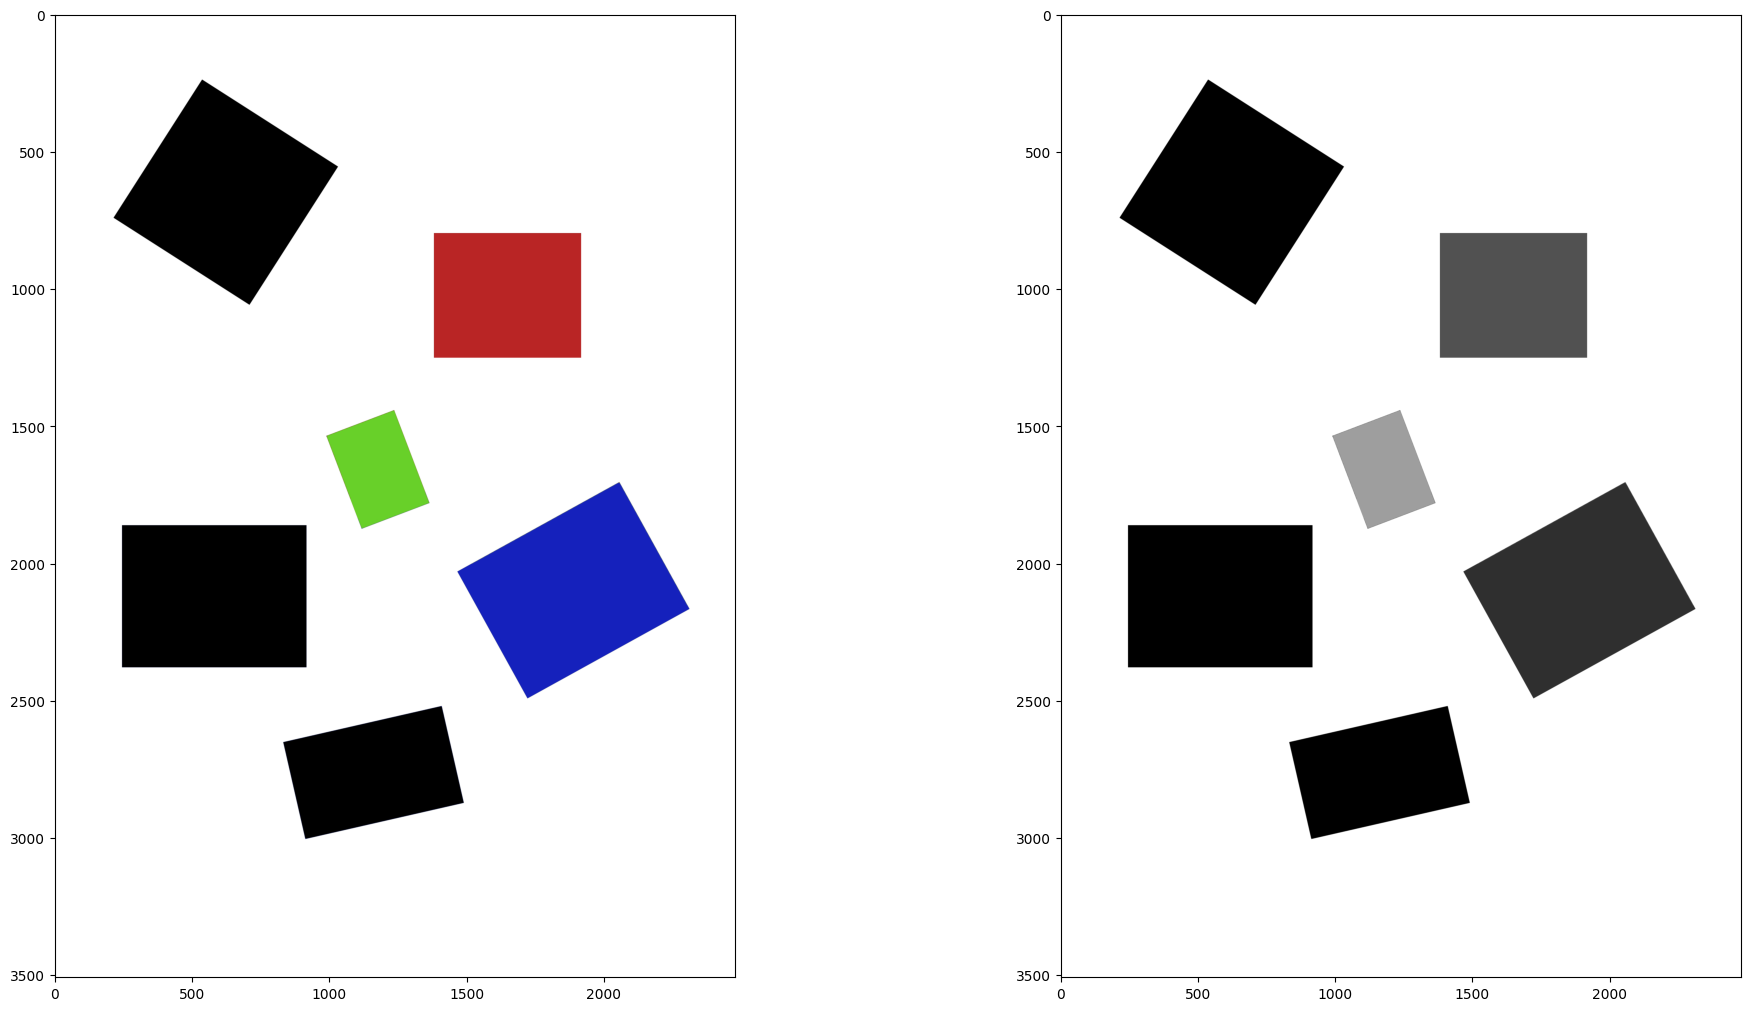

In [ ]:
# Load image

path = os.path.join('skewed_paint.png')
img_rgb = cv.imread(path, cv.IMREAD_COLOR_RGB) # Load RGB
img = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY) # Load grayscale

# Check if image was correctly loaded
if img is None:
    print("Error loading image!" )
    print("[" + path + "]")
else:
    print("Image [" + path + "] loaded!")

# Print both images
img_arr = [img_rgb, img]
plot_figures(img_arr, 2)


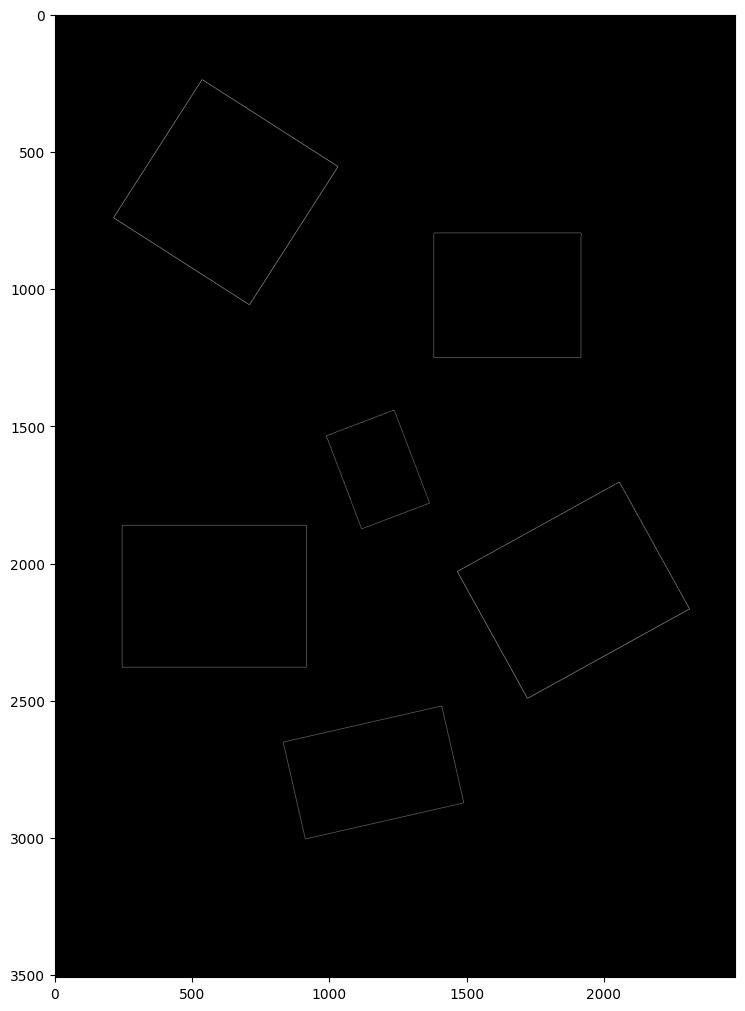

In [ ]:
# Line Detection

# Use Cannny to detect edges
edges = cv.Canny(img, 200, 100, None, 3)

# Use Hough to detect straight lines
lines = cv.HoughLines(edges, 1, np.pi/180, 100, None, 0, 0)



img_arr = [edges]
plot_figures(img_arr, 1)